In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weight-height/weight-height.csv


In [2]:
data=pd.read_csv("/kaggle/input/weight-height/weight-height.csv")

In [3]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
d1=data.shape
d1

(10000, 3)

In [5]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

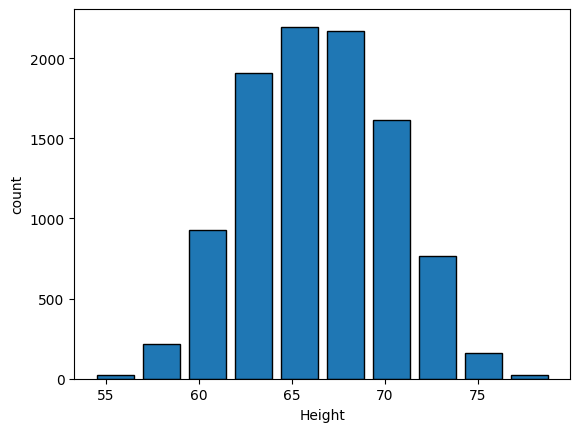

In [7]:
plt.hist(data.Height,bins=10,rwidth=0.8,edgecolor='black')
plt.xlabel("Height")
plt.ylabel("count")
plt.show()

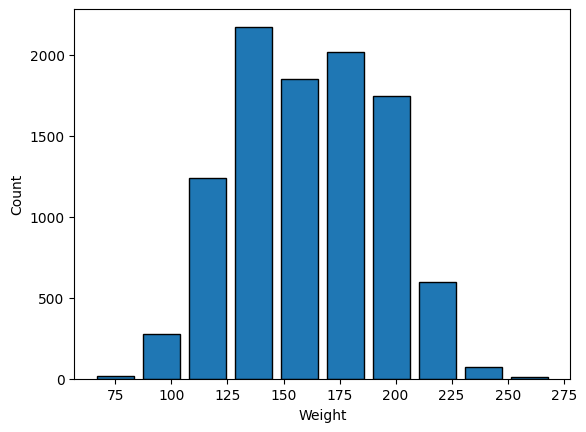

In [8]:
plt.hist(data.Weight,bins=10,rwidth=0.8,edgecolor='black')
plt.xlabel("Weight")
plt.ylabel("Count")

plt.show()

In [9]:
h_q1,h_q3=data.Height.quantile([0.25,0.75])
h_q1,h_q3

(63.505620481218955, 69.1742617268347)

# DETECT OUTLIERS BASED ON HEIGHT

In [10]:
height_IQR=(h_q3-h_q1)
height_IQR

5.668641245615746

In [11]:
lowerl_height=h_q1-1.5*height_IQR
upperl_height=h_q3+1.5*height_IQR
upperl_height,lowerl_height

(77.67722359525831, 55.00265861279534)

In [12]:
data[(data.Height<lowerl_height)|(data.Height>upperl_height)]


,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127


In [13]:
data_he=data[(data.Height>lowerl_height) & (data.Height<upperl_height)]
data_he

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


# finding outlier based on weight

In [14]:
w_q1,w_q3=data.Weight.quantile([0.25,0.75])
w_q1,w_q3

(135.8180513055015, 187.16952486868348)

In [15]:
weight_IQR=(w_q3-w_q1)
weight_IQR

51.35147356318197

In [16]:
lowerl_weight=w_q1-1.5*weight_IQR
upperl_weight=w_q3+1.5*weight_IQR
upperl_weight,lowerl_weight

(264.19673521345646, 58.79084096072856)

In [17]:
d3=data[(data.Weight<lowerl_weight)|(data.Weight>upperl_weight)]

In [18]:
d4=data[(data.Weight>lowerl_weight)&(data.Weight<upperl_weight)]

In [19]:
no_outlier=pd.concat([d3,d4])

In [20]:
no_outlier

,Gender,Height,Weight
2014,Male,78.998742,269.989699
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
